In [8]:
import pickle_mixin
print(pickle_mixin.__version__)


ModuleNotFoundError: No module named 'pickle_mixin'

In [1]:
# Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [ ]:
# Mendefinisikan path dataset
path = 'D:\Perkuliahan\SEMESTER_6\Bengkod\Capstone_Bengkod_DS01\data\ObesityDataSet.csv'

# Membaca dataset dengan menangani missing values
df = pd.read_csv(path, na_values=' ?')

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\syifa\AppData\Local\Temp\ipykernel_12820\1479725788.py:2: SyntaxWarning: invalid escape sequence '\P'
  path = 'D:\Perkuliahan\SEMESTER_6\Bengkod\Capstone_Bengkod_DS01\Dataset\ObesityDataSet.csv'


## EDA

In [8]:
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

## Preprocessing

### Menangani Missing Value

In [11]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Missing values setelah pembersihan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                              

C:\Users\syifa\AppData\Local\Temp\ipykernel_12820\4023192385.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


### Distribusi Target

In [12]:
# Distribusi target variable
df['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64

### Mengubah Nilai Kategorikal Menjadi Numerik

In [13]:
# Periksa range nilai untuk kolom numerik
numeric_columns = df.select_dtypes(include=['number']).columns # Selects columns with numeric data types

for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Kategori unik dalam Age:
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kategori unik dalam Gender:
['Female' 'Male' '?']

Kategori unik dalam Height:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kategori unik dalam Weight:
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kategori unik dalam CALC:
['no' 'Sometimes' 'Frequently' '?' 'Always']

Kategori unik dalam FAVC:
['no' 'yes' '?']

Kategori unik dalam FCVC:
['2' '3' '1' '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658' '2.725282' '2.844607' '2.44004' '2.432302'
 '2.592247' '2.449267' '2.929889' '2.015258' '1.031149' '1.592183'
 '1.21498' '1.522001' '2.703436' '2.362918' '2.14084' '2.5596' '2.336044'


In [14]:
# Menangani nilai '?' untuk setiap kolom
for column in df.columns:
    if df[column].dtype == 'object':  # Hanya untuk kolom kategorikal
        # Mengganti nilai '?' dengan mode (nilai yang paling sering muncul)
        mode_value = df[column].mode()[0]
        df[column] = df[column].replace('?', mode_value)

# Verifikasi hasil
print("Memeriksa nilai unik setiap kolom kategorikal setelah pembersihan:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())

Memeriksa nilai unik setiap kolom kategorikal setelah pembersihan:

Kategori unik dalam Age:
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kategori unik dalam Gender:
['Female' 'Male']

Kategori unik dalam Height:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kategori unik dalam Weight:
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kategori unik dalam CALC:
['no' 'Sometimes' 'Frequently' 'Always']

Kategori unik dalam FAVC:
['no' 'yes']

Kategori unik dalam FCVC:
['2' '3' '1' '8.148992744163786' '8.42397392777979' '2.450218' '2.880161'
 '2.00876' '2.596579' '2.591439' '2.392665' '1.123939' '2.027574'
 '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439' '2.059138'
 '2.310423' '2.823179' '2.052932' '2.596364' '2.767731' '2.815157'
 '2.737762' '2.524428' '2.971574' '1.0816' '1.270448' '1.344854'
 '2.959658' '2.725282' '2.844607' '2.44004' '2.432302' '2.592247'
 '2.449267' '2.929889' '2.015258' '1.031149' '1.592183' '1.21498'
 '1.522001' '

In [15]:
# Kolom kategorikal yang akan diubah ke numerik
kolom_untuk_diubah = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 
                      'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

# Buat kamus untuk menyimpan mapping
mapping = {}

# Ulangi untuk setiap kolom yang akan diubah
for kolom in kolom_untuk_diubah:
    # Dapatkan kategori unik untuk kolom saat ini
    kategori_unik = df[kolom].unique()
    
    # Buat mapping untuk kolom saat ini
    mapping_kolom = {kategori: i for i, kategori in enumerate(sorted(kategori_unik))}
    
    # Simpan mapping dalam kamus
    mapping[kolom] = mapping_kolom

# Cetak mapping untuk setiap kolom
for kolom, mapping_kolom in mapping.items():
    print(f"mapping untuk kolom '{kolom}':")
    print(mapping_kolom)
    print()

# Ganti kategori dalam dataframe
df_encoded = df.copy()
for kolom, mapping_kolom in mapping.items():
    df_encoded[kolom] = df_encoded[kolom].map(mapping_kolom)

print("5 baris pertama setelah pengkodean:")
print(df_encoded[kolom_untuk_diubah].head())

mapping untuk kolom 'Gender':
{'Female': 0, 'Male': 1}

mapping untuk kolom 'CALC':
{'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}

mapping untuk kolom 'FAVC':
{'no': 0, 'yes': 1}

mapping untuk kolom 'SCC':
{'no': 0, 'yes': 1}

mapping untuk kolom 'SMOKE':
{'no': 0, 'yes': 1}

mapping untuk kolom 'family_history_with_overweight':
{'no': 0, 'yes': 1}

mapping untuk kolom 'CAEC':
{'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}

mapping untuk kolom 'MTRANS':
{'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}

mapping untuk kolom 'NObeyesdad':
{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}

5 baris pertama setelah pengkodean:
   Gender  CALC  FAVC  SCC  SMOKE  family_history_with_overweight  CAEC  \
0       0     3     0    0      0                               1     2   
1       0     2     0    1      1                

### Menangani Duplikat

In [16]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 20


In [17]:
# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris setelah menghapus duplikat: 2091


### Menangani Outlier

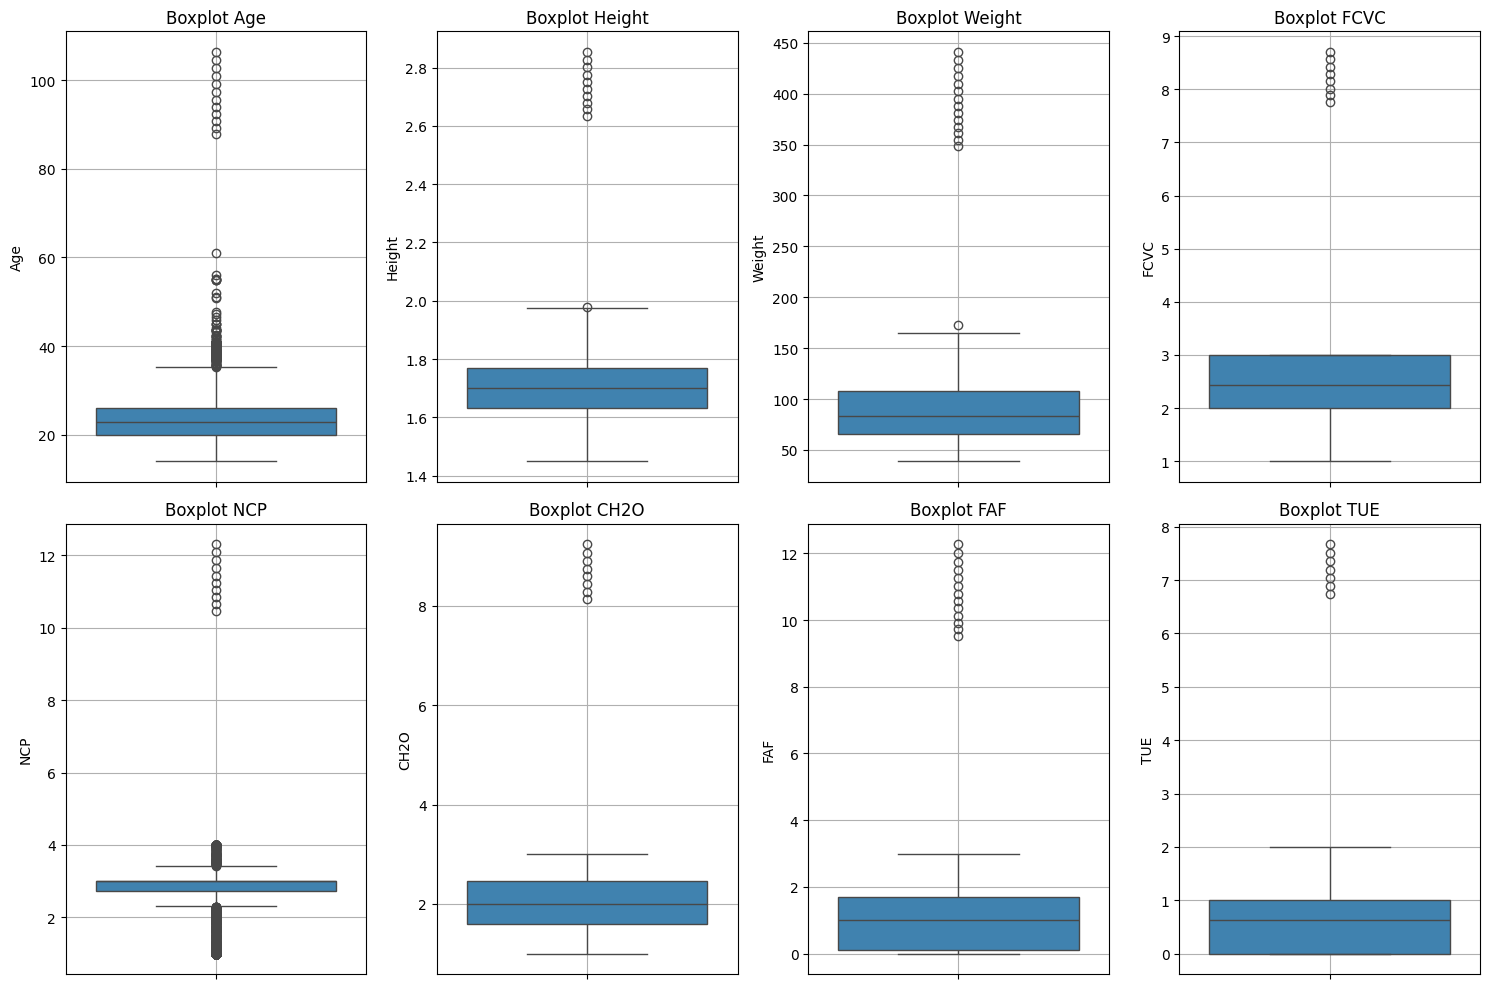


Outlier pada Age:
Jumlah outlier: 176
Persentase outlier: 8.42%
Batas bawah: 10.52
Batas atas: 35.29

Outlier pada Height:
Jumlah outlier: 11
Persentase outlier: 0.53%
Batas bawah: 1.42
Batas atas: 1.98

Outlier pada Weight:
Jumlah outlier: 15
Persentase outlier: 0.72%
Batas bawah: 2.90
Batas atas: 171.17

Outlier pada FCVC:
Jumlah outlier: 8
Persentase outlier: 0.38%
Batas bawah: 0.50
Batas atas: 4.50

Outlier pada NCP:
Jumlah outlier: 599
Persentase outlier: 28.65%
Batas bawah: 2.31
Batas atas: 3.42

Outlier pada CH2O:
Jumlah outlier: 8
Persentase outlier: 0.38%
Batas bawah: 0.29
Batas atas: 3.76

Outlier pada FAF:
Jumlah outlier: 13
Persentase outlier: 0.62%
Batas bawah: -2.25
Batas atas: 4.04

Outlier pada TUE:
Jumlah outlier: 7
Persentase outlier: 0.33%
Batas bawah: -1.50
Batas atas: 2.50


In [18]:
# Mengkonversi kolom numerik ke float
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Membuat boxplot untuk kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=col, color='#2E86C1')
    plt.title(f'Boxplot {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Menghitung dan menampilkan statistik outlier
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)][col]
    
    print(f"\nOutlier pada {col}:")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Persentase outlier: {(len(outliers)/len(df))*100:.2f}%")
    print(f"Batas bawah: {batas_bawah:.2f}")
    print(f"Batas atas: {batas_atas:.2f}")

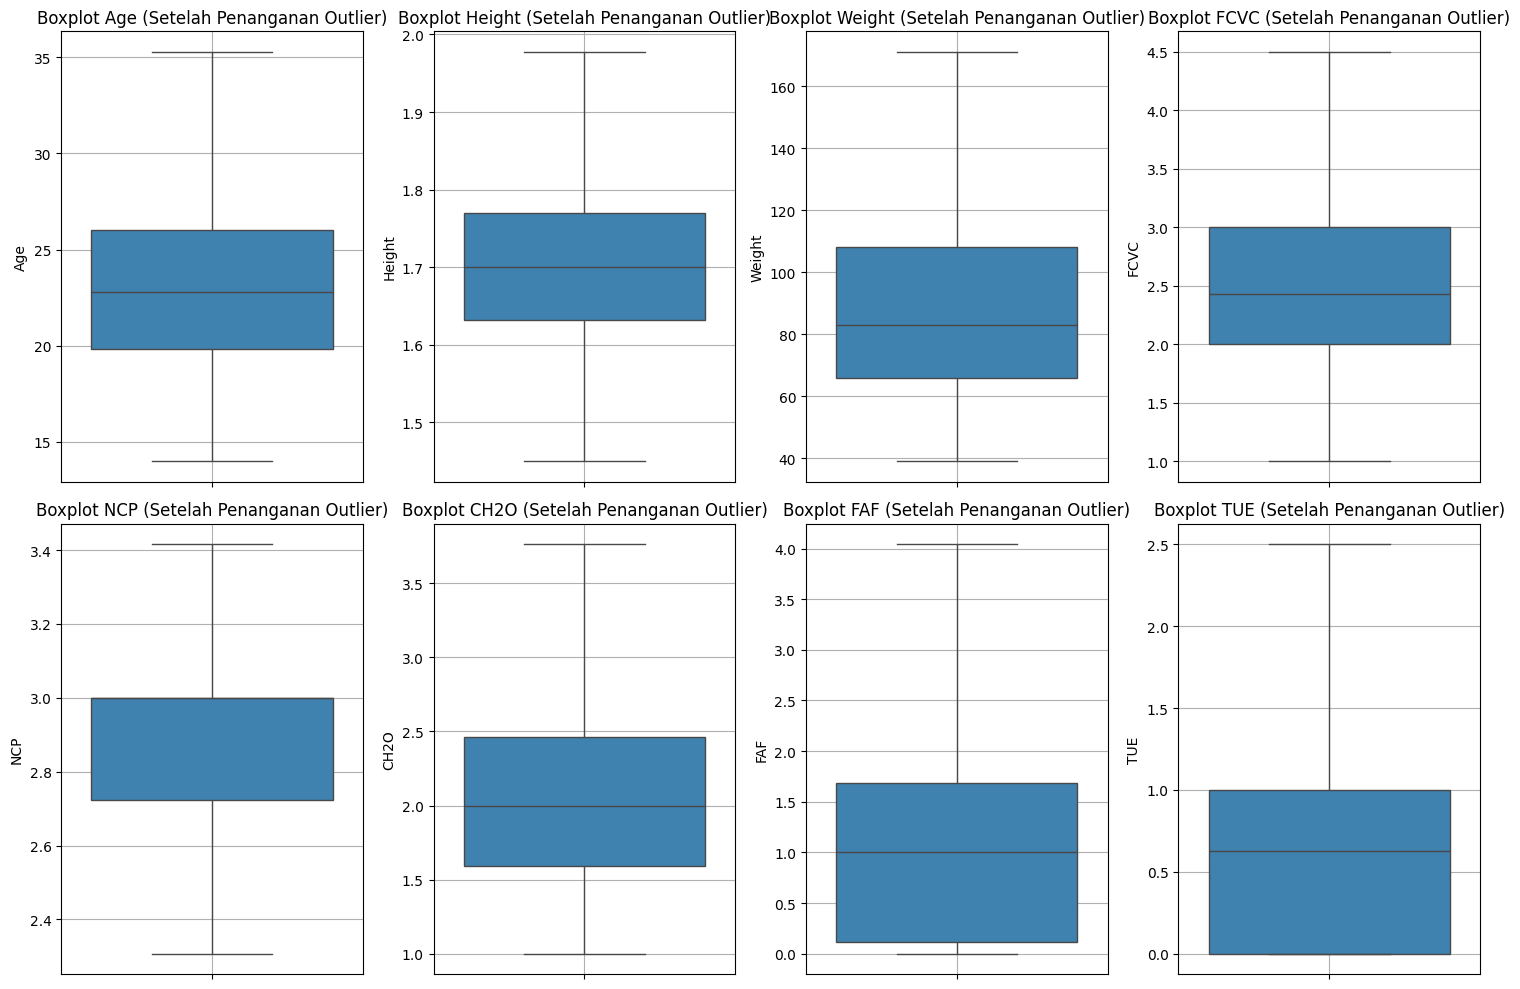

In [19]:
# Fungsi untuk menangani outlier menggunakan metode IQR dengan pembatasan
def tangani_outlier(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    # Membatasi nilai outlier
    df[kolom] = df[kolom].clip(lower=batas_bawah, upper=batas_atas)
    
    return df

# Menangani outlier untuk setiap kolom numerik
for col in numeric_cols:
    df = tangani_outlier(df, col)

# Membuat boxplot setelah penanganan outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=col, color='#2E86C1')
    plt.title(f'Boxplot {col} (Setelah Penanganan Outlier)')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Menangani Data Imbalance 

In [20]:
# Label encoding untuk variabel kategorikal
le = LabelEncoder()
df_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Memisahkan fitur dan target
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Membuat dataframe baru yang sudah seimbang
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['NObeyesdad'] = y_balanced


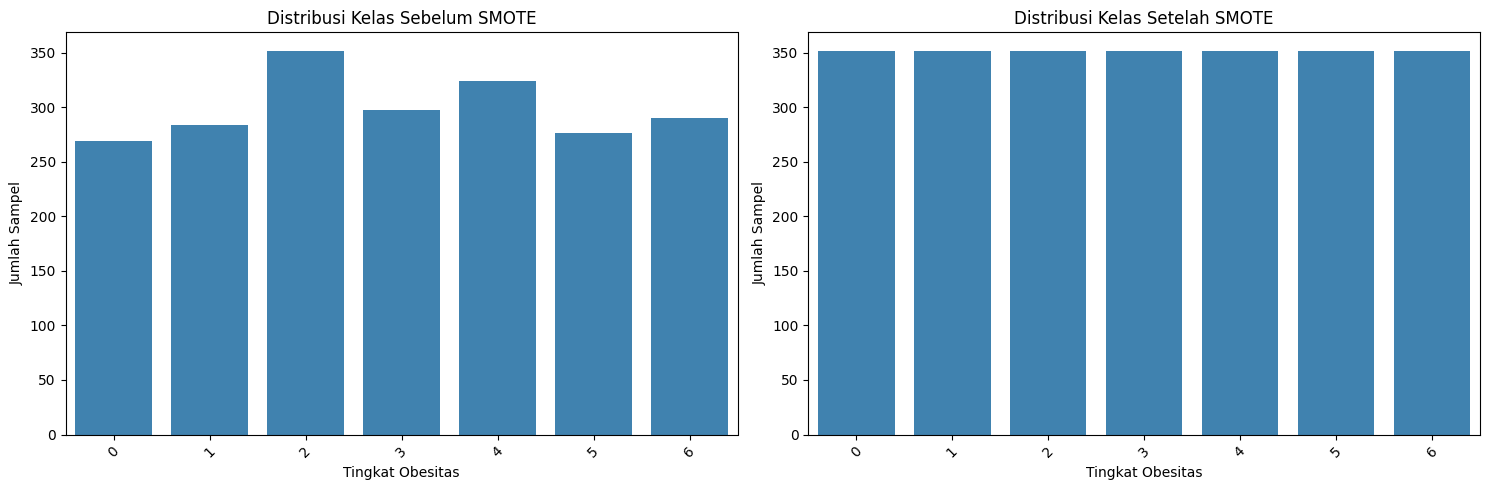


Perbandingan Distribusi Kelas (dalam %):
            Sebelum SMOTE  Setelah SMOTE
NObeyesdad                              
0                    12.9           14.3
1                    13.6           14.3
2                    16.8           14.3
3                    14.2           14.3
4                    15.5           14.3
5                    13.2           14.3
6                    13.9           14.3


In [21]:
# Membuat figure dengan subplot untuk visualisasi distribusi kelas
plt.figure(figsize=(15, 5))

# Plot distribusi kelas sebelum SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y, color='#2E86C1')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Tingkat Obesitas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)

# Plot distribusi kelas setelah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_balanced, color='#2E86C1')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Tingkat Obesitas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)

# Mengatur tata letak plot
plt.tight_layout()
plt.show()

# Menampilkan perbandingan dalam bentuk tabel
comparison = pd.DataFrame({
    'Sebelum SMOTE': y.value_counts(normalize=True),
    'Setelah SMOTE': y_balanced.value_counts(normalize=True)
}).round(3) * 100

print("\nPerbandingan Distribusi Kelas (dalam %):")
print(comparison)

### Normalisasi Fitur Numerik

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi fitur numerik menggunakan Min-Max Scaler (penskalaan ke range 0-1)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# List kolom numerik yang akan dinormalisasi 
kolom_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Lakukan normalisasi pada data asli
df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])

# Tampilkan hasil normalisasi untuk 5 data pertama
print("Hasil normalisasi 5 data pertama:")
print(df[kolom_numerik].head())

# Tampilkan statistik deskriptif setelah normalisasi
print("\nStatistik deskriptif setelah normalisasi:")
print(df[kolom_numerik].describe())

Hasil normalisasi 5 data pertama:
        Age    Height    Weight      FCVC    NCP      CH2O       FAF  TUE
0  0.328815  0.322218  0.189153  0.285714  0.625  0.361868  0.000000  0.4
1  0.328815  0.132678  0.128624  0.571429  0.625  0.723737  0.742196  0.0
2  0.422763  0.663390  0.287513  0.285714  0.625  0.361868  0.494797  0.4
3  0.610657  0.663390  0.363174  0.571429  0.625  0.361868  0.494797  0.0
4  0.375789  0.625482  0.384360  0.285714  0.000  0.361868  0.000000  0.0

Statistik deskriptif setelah normalisasi:
               Age       Height       Weight         FCVC          NCP  \
count  2091.000000  2091.000000  2091.000000  2091.000000  2091.000000   
mean      0.467243     0.480865     0.365210     0.410534     0.509287   
std       0.253105     0.179324     0.203158     0.157022     0.297464   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.272806     0.344213     0.204286     0.285714     0.375000   
50%       0.413594     0.475038    

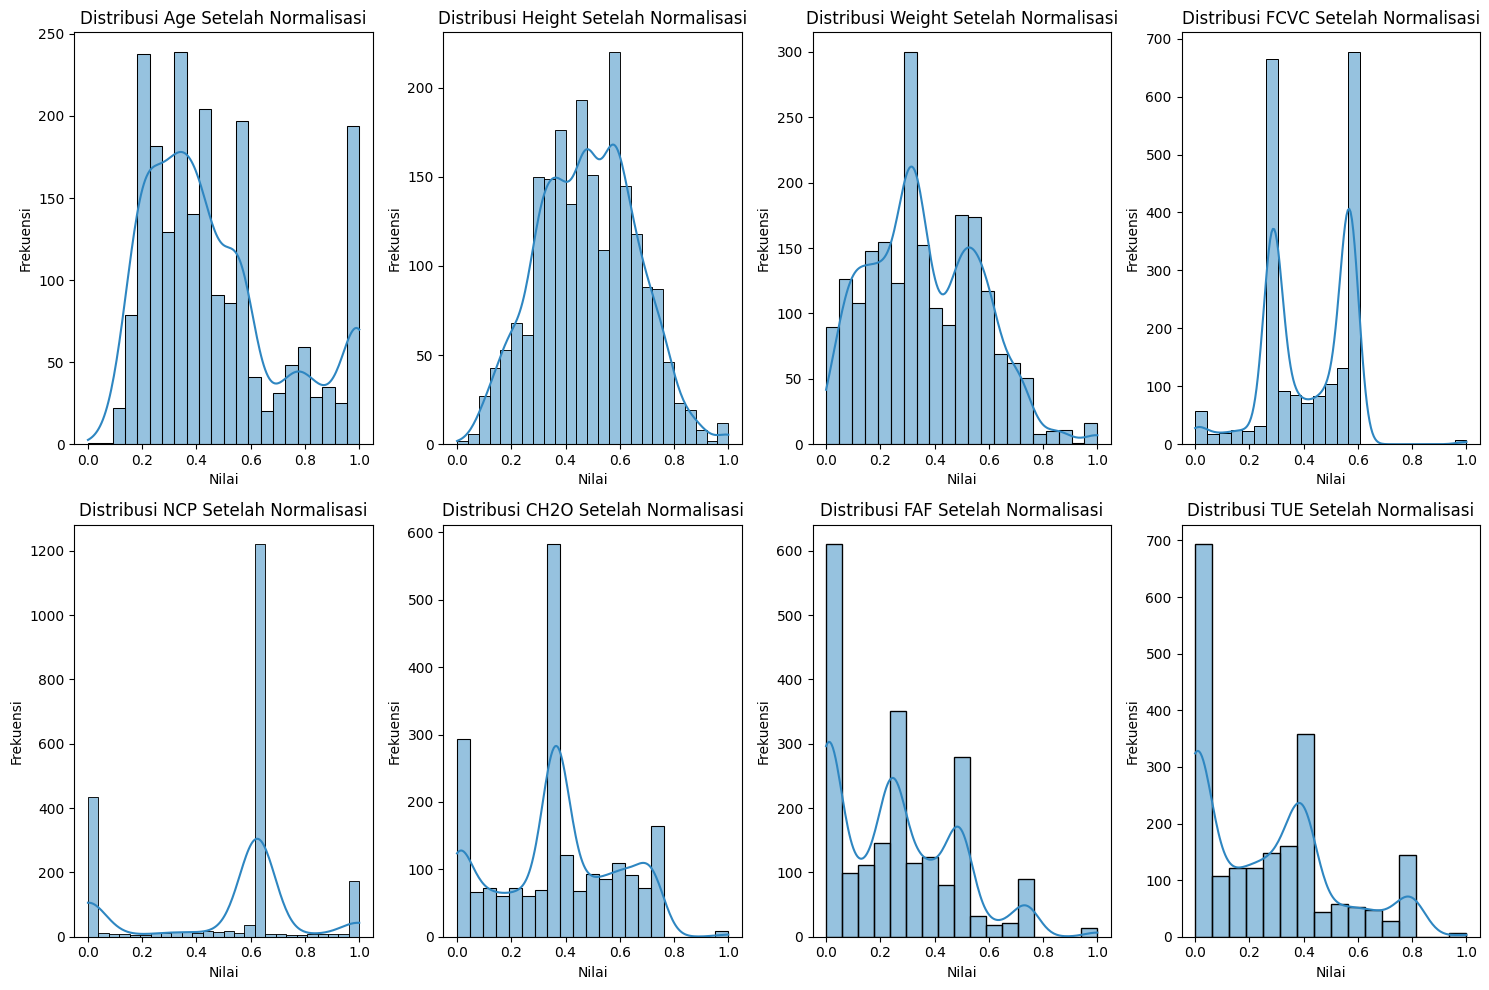

In [23]:
# Membuat visualisasi distribusi fitur setelah normalisasi
plt.figure(figsize=(15, 10))

# Mengatur warna yang konsisten
color = '#2E86C1'

# Membuat subplot untuk setiap kolom numerik
for i, col in enumerate(kolom_numerik, 1):
    plt.subplot(2, 4, i)
    
    # Membuat histogram dengan KDE
    sns.histplot(data=df, x=col, color=color, kde=True)
    
    plt.title(f'Distribusi {col} Setelah Normalisasi')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    
# Mengatur tata letak
plt.tight_layout()
plt.show()

### Korelasi Heatmap

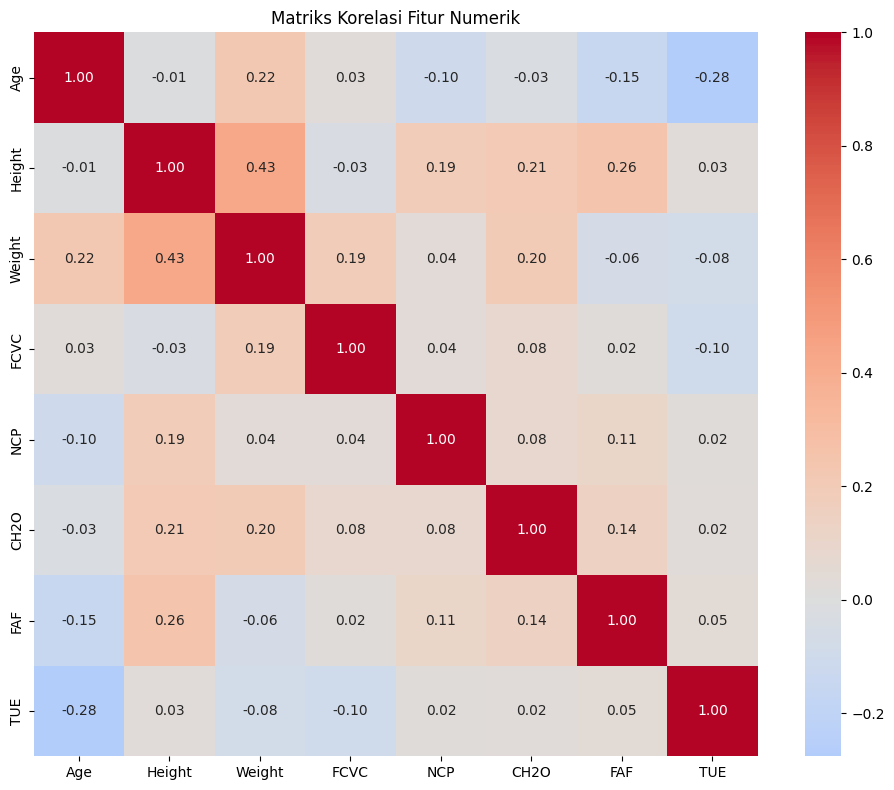

In [24]:
# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = df[kolom_numerik].corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Matriks Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

## Modeling

In [25]:
# Import libraries untuk modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import time
import pickle
import warnings
warnings.filterwarnings('ignore')

### Random Forest

In [26]:
#  PERSIAPAN DATA UNTUK RANDOM FOREST

# Menggunakan data yang sudah dibalance dengan SMOTE
X = df_balanced.drop('NObeyesdad', axis=1)
y = df_balanced['NObeyesdad']

print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Distribusi kelas target:\n{y.value_counts()}")

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData training: {X_train.shape[0]} sampel")
print(f"Data testing: {X_test.shape[0]} sampel")

Jumlah sampel: 2457
Jumlah fitur: 16
Distribusi kelas target:
NObeyesdad
1    351
5    351
6    351
2    351
0    351
3    351
4    351
Name: count, dtype: int64

Data training: 1965 sampel
Data testing: 492 sampel


In [27]:
# RANDOM FOREST MODEL

# Inisialisasi model Random Forest
start_time = time.time()
model_rf = RandomForestClassifier(random_state=42)

# Latih model
model_rf.fit(X_train, y_train)

end_time = time.time()
training_time_rf = end_time - start_time

print(f"Waktu pelatihan Random Forest: {training_time_rf:.4f} detik")

Waktu pelatihan Random Forest: 0.3136 detik


In [28]:
# DEDISION TREE MODEL

# Inisialisasi model Decision Tree
start_time = time.time()
model_dt = DecisionTreeClassifier(random_state=42)

# Latih model
model_dt.fit(X_train, y_train)

end_time = time.time()
training_time_dt = end_time - start_time

print(f"Waktu pelatihan Decision Tree: {training_time_dt:.4f} detik")

Waktu pelatihan Decision Tree: 0.0075 detik


In [29]:
# KNN MODEL

# Inisialisasi model KNN
start_time = time.time()
model_knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
model_knn.fit(X_train, y_train)

end_time = time.time()
training_time_knn = end_time - start_time

print(f"Waktu pelatihan KNN: {training_time_knn:.4f} detik")

Waktu pelatihan KNN: 0.0024 detik


### Evaluasi Model

In [30]:
# Dictionary untuk menyimpan hasil
models = {
    'Random Forest': model_rf,
    'Decision Tree': model_dt,
    'KNN': model_knn  # Changed from SVM to KNN
}

training_times = {
    'Random Forest': training_time_rf,
    'Decision Tree': training_time_dt,
    'KNN': training_time_knn  # Changed from SVM to KNN
}

results = {}
prediction_times = {}

# Target names untuk evaluasi
target_names = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

print("Evaluasi performa setiap model...")

for name, model in models.items():
    print(f"\n{'-'*60}")
    print(f"Evaluasi {name}...")
    
    # Prediction dengan time tracking
    start_time = time.time()
    
    # Removed SVM specific condition since all models use same prediction method
    y_pred = model.predict(X_test)
    
    end_time = time.time()
    prediction_times[name] = end_time - start_time
    
    # Evaluasi metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Simpan hasil
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"Waktu prediksi: {prediction_times[name]:.4f} detik")
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

Evaluasi performa setiap model...

------------------------------------------------------------
Evaluasi Random Forest...
Waktu prediksi: 0.0070 detik
Akurasi: 0.9451
Precision: 0.9457
Recall: 0.9451
F1-Score: 0.9453

------------------------------------------------------------
Evaluasi Decision Tree...
Waktu prediksi: 0.0007 detik
Akurasi: 0.9248
Precision: 0.9263
Recall: 0.9248
F1-Score: 0.9252

------------------------------------------------------------
Evaluasi KNN...
Waktu prediksi: 0.0206 detik
Akurasi: 0.8496
Precision: 0.8551
Recall: 0.8496
F1-Score: 0.8455


PERBANDINGAN PERFORMA MODEL:
           Model  Accuracy  Precision  Recall  F1-Score  Training Time (s)  \
0  Random Forest    0.9451     0.9457  0.9451    0.9453             0.3136   
1  Decision Tree    0.9248     0.9263  0.9248    0.9252             0.0075   
2            KNN    0.8496     0.8551  0.8496    0.8455             0.0024   

   Prediction Time (s)  
0               0.0070  
1               0.0007  
2               0.0206  


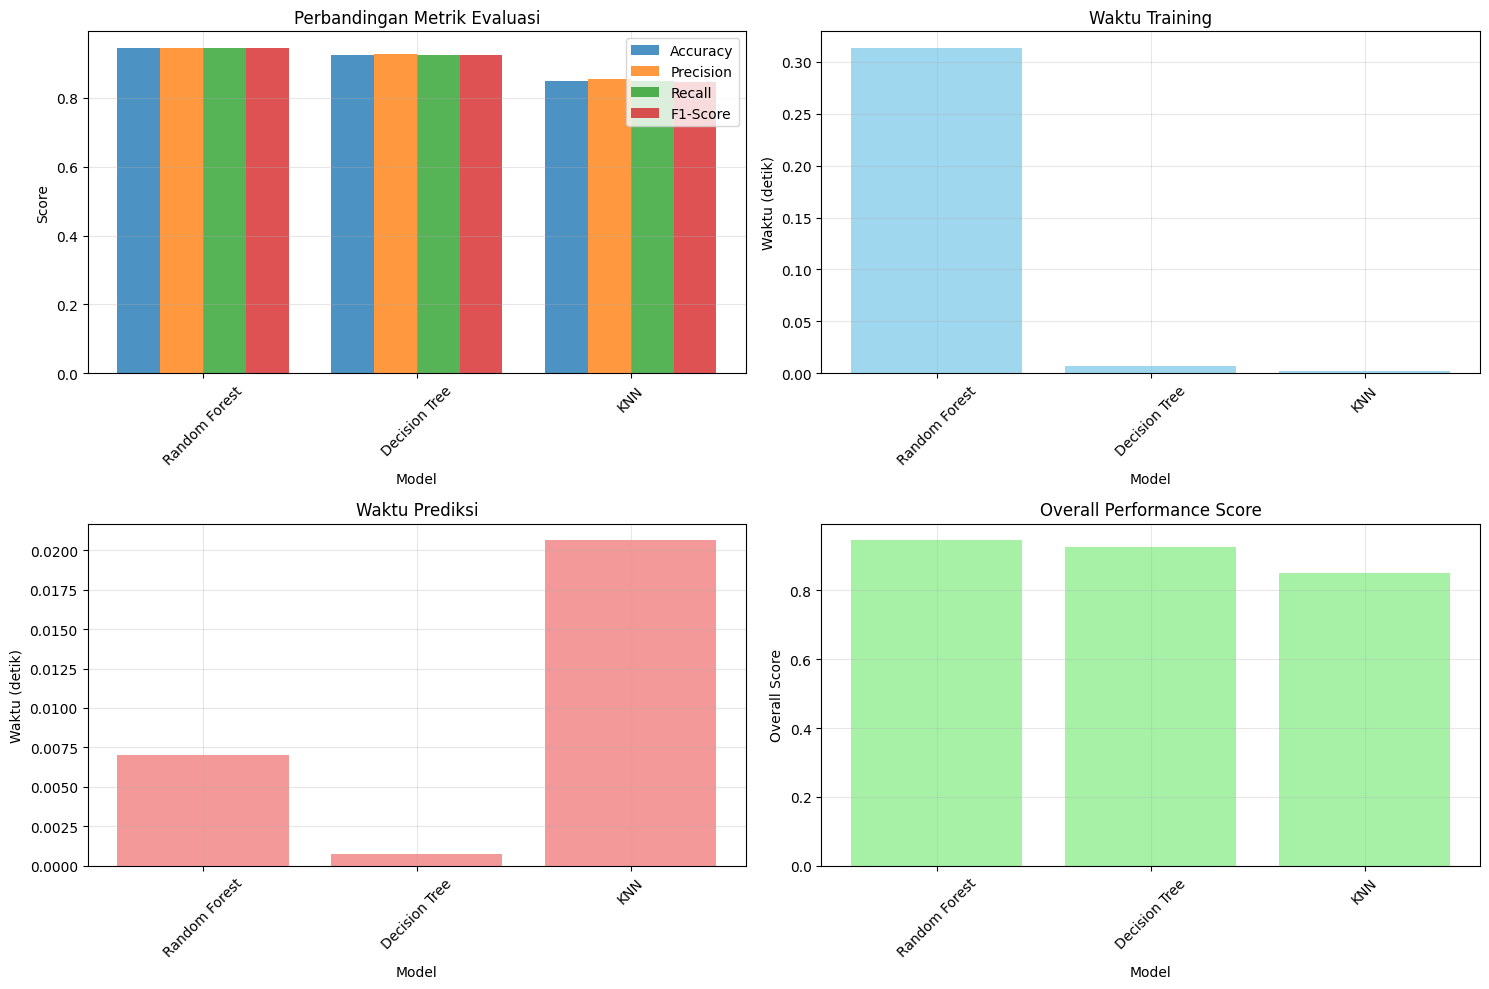

In [31]:
# Buat DataFrame untuk komparasi
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'Precision': [results[model]['precision'] for model in results.keys()],
    'Recall': [results[model]['recall'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()],
    'Training Time (s)': [training_times[model] for model in results.keys()],
    'Prediction Time (s)': [prediction_times[model] for model in results.keys()]
})

print("PERBANDINGAN PERFORMA MODEL:")
print(comparison_df.round(4))

# Visualisasi perbandingan performa
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Accuracy, Precision, Recall, F1-Score
x = np.arange(len(comparison_df))
width = 0.2

axes[0, 0].bar(x - width*1.5, comparison_df['Accuracy'], width, label='Accuracy', alpha=0.8)
axes[0, 0].bar(x - width/2, comparison_df['Precision'], width, label='Precision', alpha=0.8)
axes[0, 0].bar(x + width/2, comparison_df['Recall'], width, label='Recall', alpha=0.8)
axes[0, 0].bar(x + width*1.5, comparison_df['F1-Score'], width, label='F1-Score', alpha=0.8)
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Perbandingan Metrik Evaluasi')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(comparison_df['Model'], rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Training Time
axes[0, 1].bar(comparison_df['Model'], comparison_df['Training Time (s)'], color='skyblue', alpha=0.8)
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Waktu (detik)')
axes[0, 1].set_title('Waktu Training')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Prediction Time
axes[1, 0].bar(comparison_df['Model'], comparison_df['Prediction Time (s)'], color='lightcoral', alpha=0.8)
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Waktu (detik)')
axes[1, 0].set_title('Waktu Prediksi')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Overall Performance Score
overall_score = (comparison_df['Accuracy'] + comparison_df['Precision'] + 
                comparison_df['Recall'] + comparison_df['F1-Score']) / 4
axes[1, 1].bar(comparison_df['Model'], overall_score, color='lightgreen', alpha=0.8)
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Overall Score')
axes[1, 1].set_title('Overall Performance Score')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

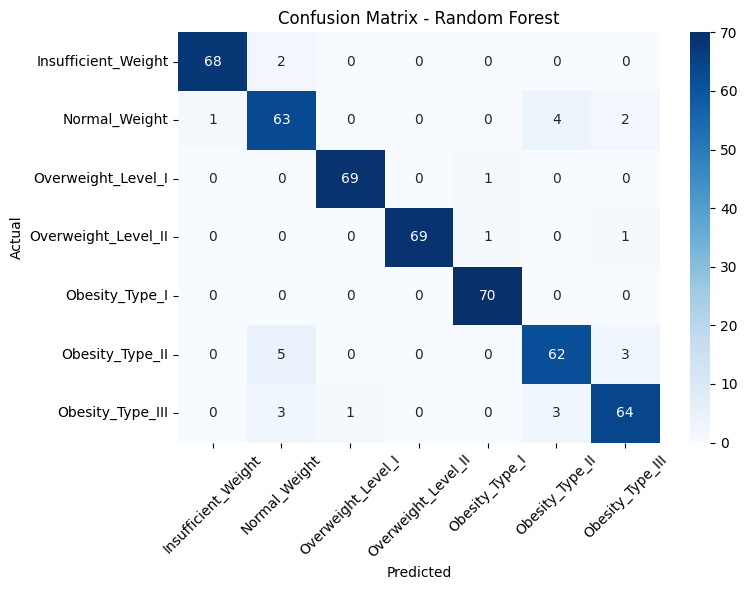


Random Forest Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.97      0.98        70
      Normal_Weight       0.86      0.90      0.88        70
 Overweight_Level_I       0.99      0.99      0.99        70
Overweight_Level_II       1.00      0.97      0.99        71
     Obesity_Type_I       0.97      1.00      0.99        70
    Obesity_Type_II       0.90      0.89      0.89        70
   Obesity_Type_III       0.91      0.90      0.91        71

           accuracy                           0.95       492
          macro avg       0.95      0.95      0.95       492
       weighted avg       0.95      0.95      0.95       492



In [32]:
# Plot Confusion Matrix and Classification Report - Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(results['Random Forest']['confusion_matrix'], 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=target_names, 
            yticklabels=target_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nRandom Forest Classification Report:")

print(classification_report(y_test, results['Random Forest']['y_pred'], target_names=target_names))

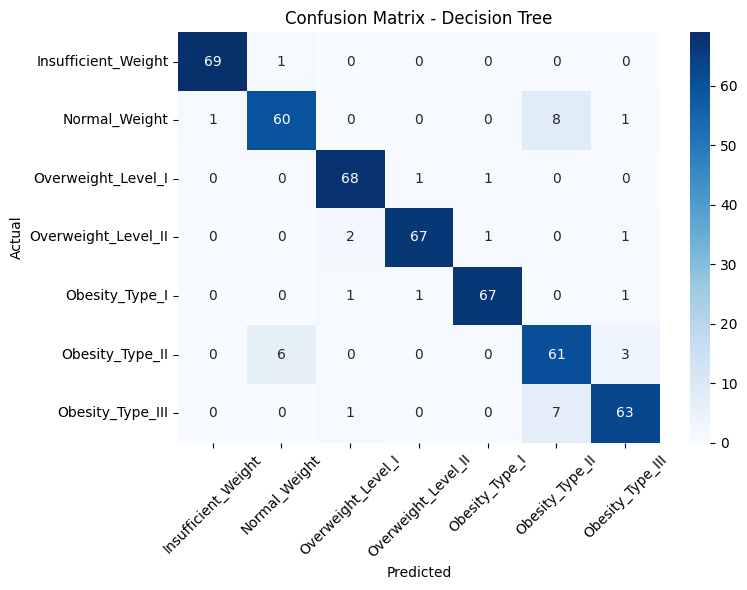


Decision Tree Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.99      0.99        70
      Normal_Weight       0.90      0.86      0.88        70
 Overweight_Level_I       0.94      0.97      0.96        70
Overweight_Level_II       0.97      0.94      0.96        71
     Obesity_Type_I       0.97      0.96      0.96        70
    Obesity_Type_II       0.80      0.87      0.84        70
   Obesity_Type_III       0.91      0.89      0.90        71

           accuracy                           0.92       492
          macro avg       0.93      0.92      0.93       492
       weighted avg       0.93      0.92      0.93       492



In [33]:
# Plot Confusion Matrix and Classification Report - Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(results['Decision Tree']['confusion_matrix'], 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=target_names, 
            yticklabels=target_names)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, results['Decision Tree']['y_pred'], target_names=target_names))

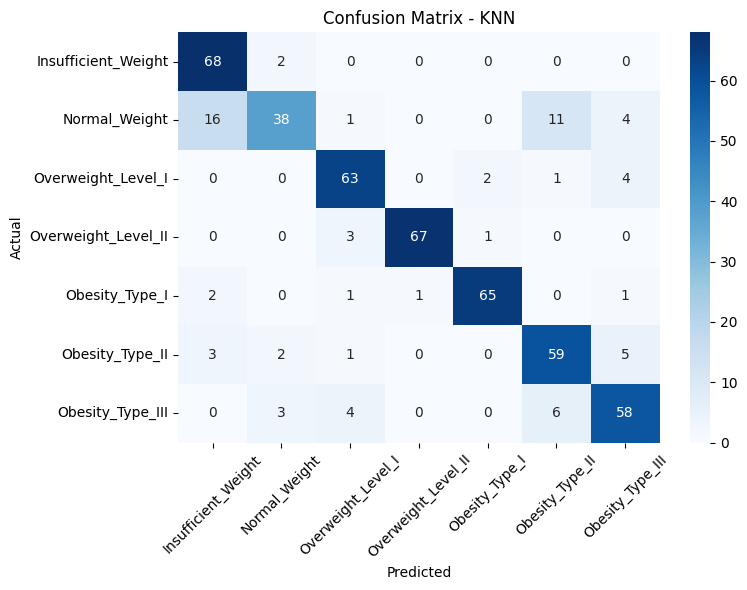


KNN Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.97      0.86        70
      Normal_Weight       0.84      0.54      0.66        70
 Overweight_Level_I       0.86      0.90      0.88        70
Overweight_Level_II       0.99      0.94      0.96        71
     Obesity_Type_I       0.96      0.93      0.94        70
    Obesity_Type_II       0.77      0.84      0.80        70
   Obesity_Type_III       0.81      0.82      0.81        71

           accuracy                           0.85       492
          macro avg       0.85      0.85      0.85       492
       weighted avg       0.86      0.85      0.85       492



In [34]:
# Plot Confusion Matrix and Classification Report - KNN
plt.figure(figsize=(8, 6))
sns.heatmap(results['KNN']['confusion_matrix'], 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=target_names, 
            yticklabels=target_names)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nKNN Classification Report:")
print(classification_report(y_test, results['KNN']['y_pred'], target_names=target_names))

In [35]:
# KESIMPULAN DAN REKOMENDASI

best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']
best_accuracy = comparison_df['Accuracy'].max()

print("HASIL PEMODELAN DENGAN 3 ALGORITMA:")
print(f" Model terbaik: {best_model}")
print(f" Akurasi tertinggi: {best_accuracy:.4f}")

print("\nANALISIS PERFORMA:")
for _, row in comparison_df.iterrows():
    print(f"• {row['Model']}: Akurasi {row['Accuracy']:.4f}, Training {row['Training Time (s)']:.4f}s")

print("\nREKOMENDASI:")
fastest_training = comparison_df.loc[comparison_df['Training Time (s)'].idxmin(), 'Model']
fastest_prediction = comparison_df.loc[comparison_df['Prediction Time (s)'].idxmin(), 'Model']
print(f"• Untuk akurasi tertinggi: {best_model}")
print(f"• Untuk training tercepat: {fastest_training}")
print(f"• Untuk prediksi tercepat: {fastest_prediction}")


HASIL PEMODELAN DENGAN 3 ALGORITMA:
 Model terbaik: Random Forest
 Akurasi tertinggi: 0.9451

ANALISIS PERFORMA:
• Random Forest: Akurasi 0.9451, Training 0.3136s
• Decision Tree: Akurasi 0.9248, Training 0.0075s
• KNN: Akurasi 0.8496, Training 0.0024s

REKOMENDASI:
• Untuk akurasi tertinggi: Random Forest
• Untuk training tercepat: KNN
• Untuk prediksi tercepat: Decision Tree


### Hyperparameter Tuning

In [36]:
# Parameter grids untuk tuning
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }
}

# Hasil tuning
tuned_results = {}
tuning_times = {}

print("Melakukan hyperparameter tuning untuk setiap model...")

for name in models.keys():
    print(f"\n{'-'*60}")
    print(f"Tuning {name}...")
    
    start_time = time.time()
    
    # Grid Search
    grid_search = GridSearchCV(
        models[name], 
        param_grids[name], 
        cv=3, 
        scoring='accuracy',
        n_jobs=-1
    )
    
    # Fit model
    grid_search.fit(X_train, y_train)
    y_pred_tuned = grid_search.predict(X_test)
    
    end_time = time.time()
    tuning_times[name] = end_time - start_time
    
    # Evaluasi model yang sudah di-tune
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
    recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
    f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
    
    # Simpan hasil
    tuned_results[name] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'y_pred': y_pred_tuned,
        'accuracy': accuracy_tuned,
        'precision': precision_tuned,
        'recall': recall_tuned,
        'f1_score': f1_tuned,
        'confusion_matrix': confusion_matrix(y_test, y_pred_tuned)
    }
    
    print(f"Waktu tuning: {tuning_times[name]:.4f} detik")
    print(f"Best CV Score: {grid_search.best_score_:.4f}")
    print(f"Test Accuracy: {accuracy_tuned:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")

Melakukan hyperparameter tuning untuk setiap model...

------------------------------------------------------------
Tuning Random Forest...
Waktu tuning: 24.5077 detik
Best CV Score: 0.9430
Test Accuracy: 0.9593
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

------------------------------------------------------------
Tuning Decision Tree...
Waktu tuning: 1.1263 detik
Best CV Score: 0.9232
Test Accuracy: 0.9390
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}

------------------------------------------------------------
Tuning KNN...
Waktu tuning: 0.7306 detik
Best CV Score: 0.9160
Test Accuracy: 0.9085
Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


### PERBANDINGAN PERFORMA SEBELUM DAN SESUDAH TUNING

PERBANDINGAN PERFORMA SEBELUM DAN SESUDAH TUNING:
           Model  Accuracy_Before  Accuracy_After  Improvement  F1_Before  \
0  Random Forest           0.9451          0.9593       0.0142     0.9453   
1  Decision Tree           0.9248          0.9390       0.0142     0.9252   
2            KNN           0.8496          0.9085       0.0589     0.8455   

   F1_After  F1_Improvement  
0    0.9593          0.0141  
1    0.9393          0.0141  
2    0.9072          0.0617  


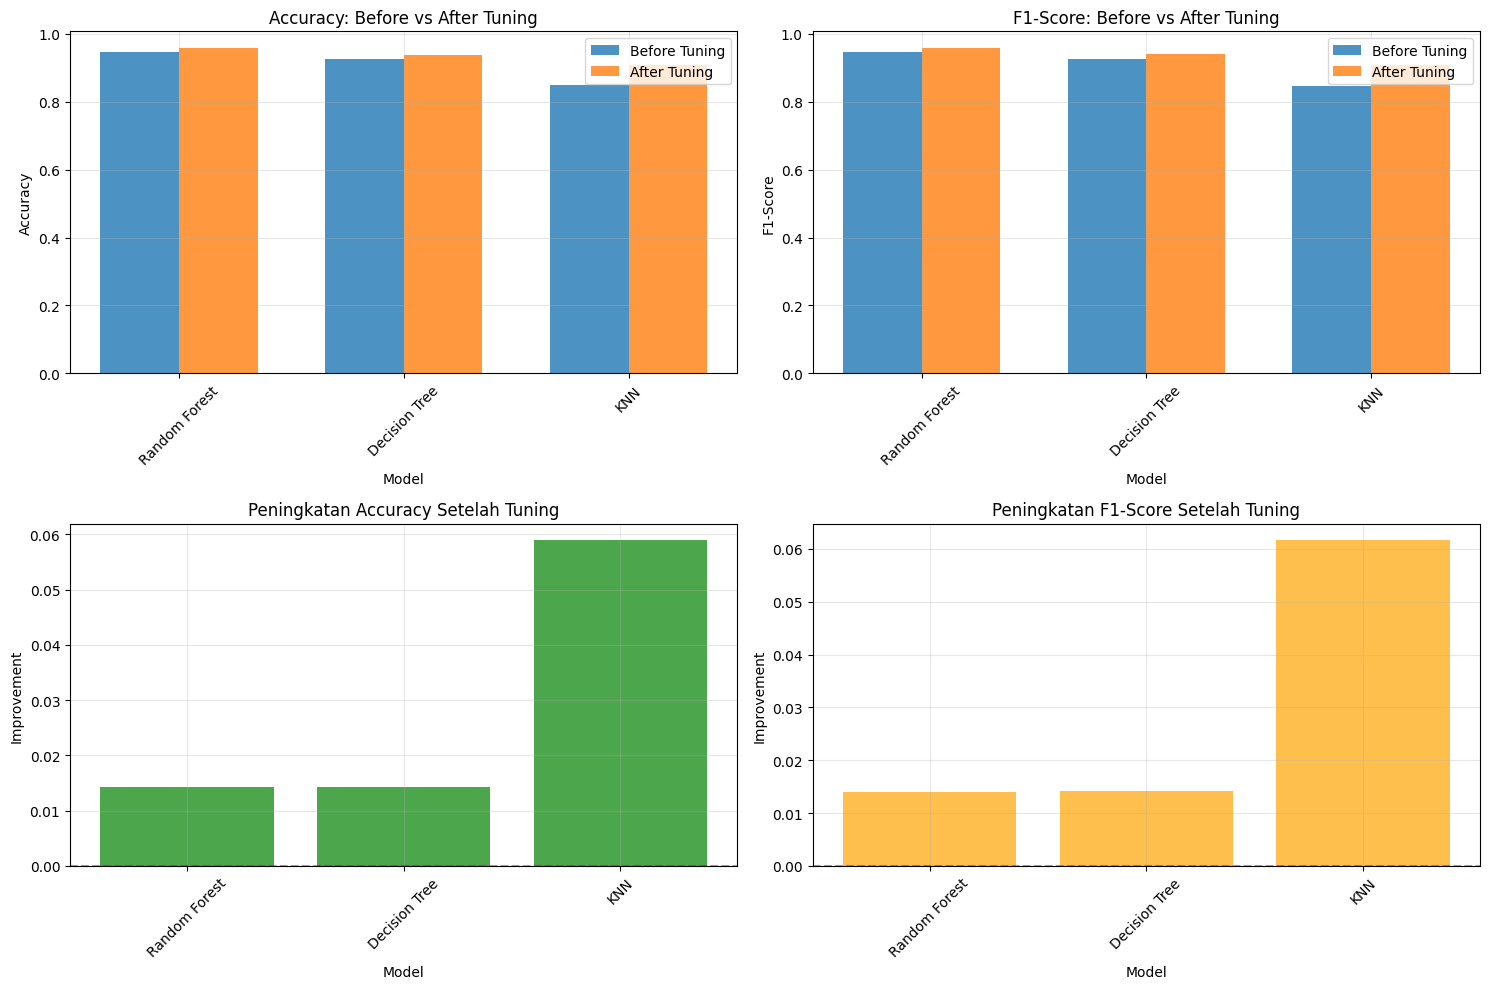

In [37]:
# Buat DataFrame untuk komparasi
comparison_tuned_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy_Before': [results[model]['accuracy'] for model in results.keys()],
    'Accuracy_After': [tuned_results[model]['accuracy'] for model in results.keys()],
    'Improvement': [tuned_results[model]['accuracy'] - results[model]['accuracy'] for model in results.keys()],
    'F1_Before': [results[model]['f1_score'] for model in results.keys()],
    'F1_After': [tuned_results[model]['f1_score'] for model in results.keys()],
    'F1_Improvement': [tuned_results[model]['f1_score'] - results[model]['f1_score'] for model in results.keys()]
})

print("PERBANDINGAN PERFORMA SEBELUM DAN SESUDAH TUNING:")
print(comparison_tuned_df.round(4))

# Visualisasi perbandingan sebelum dan sesudah tuning
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Accuracy Before vs After
x = np.arange(len(comparison_tuned_df))
width = 0.35

axes[0, 0].bar(x - width/2, comparison_tuned_df['Accuracy_Before'], width, label='Before Tuning', alpha=0.8)
axes[0, 0].bar(x + width/2, comparison_tuned_df['Accuracy_After'], width, label='After Tuning', alpha=0.8)
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy: Before vs After Tuning')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(comparison_tuned_df['Model'], rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: F1-Score Before vs After
axes[0, 1].bar(x - width/2, comparison_tuned_df['F1_Before'], width, label='Before Tuning', alpha=0.8)
axes[0, 1].bar(x + width/2, comparison_tuned_df['F1_After'], width, label='After Tuning', alpha=0.8)
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].set_title('F1-Score: Before vs After Tuning')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(comparison_tuned_df['Model'], rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Improvement in Accuracy
axes[1, 0].bar(comparison_tuned_df['Model'], comparison_tuned_df['Improvement'], 
               color='green', alpha=0.7)
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Improvement')
axes[1, 0].set_title('Peningkatan Accuracy Setelah Tuning')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# Plot 4: Improvement in F1-Score
axes[1, 1].bar(comparison_tuned_df['Model'], comparison_tuned_df['F1_Improvement'], 
               color='orange', alpha=0.7)
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Improvement')
axes[1, 1].set_title('Peningkatan F1-Score Setelah Tuning')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Feature Importance

MODEL TERBAIK SETELAH TUNING: Random Forest
AKURASI TERBAIK: 0.9593

Best Parameters untuk Random Forest:
  max_depth: 20
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 300

Performa Final Random Forest:
  Accuracy: 0.9593
  Precision: 0.9595
  Recall: 0.9593
  F1-Score: 0.9593

Feature Importance - Random Forest:
--------------------------------------------------
Top 10 Fitur Terpenting:
 1. Weight              : 0.3486
 2. Height              : 0.1027
 3. Age                 : 0.0927
 4. FCVC                : 0.0850
 5. Gender              : 0.0560
 6. FAF                 : 0.0447
 7. NCP                 : 0.0447
 8. TUE                 : 0.0443
 9. CH2O                : 0.0434
10. family_history_with_overweight: 0.0329


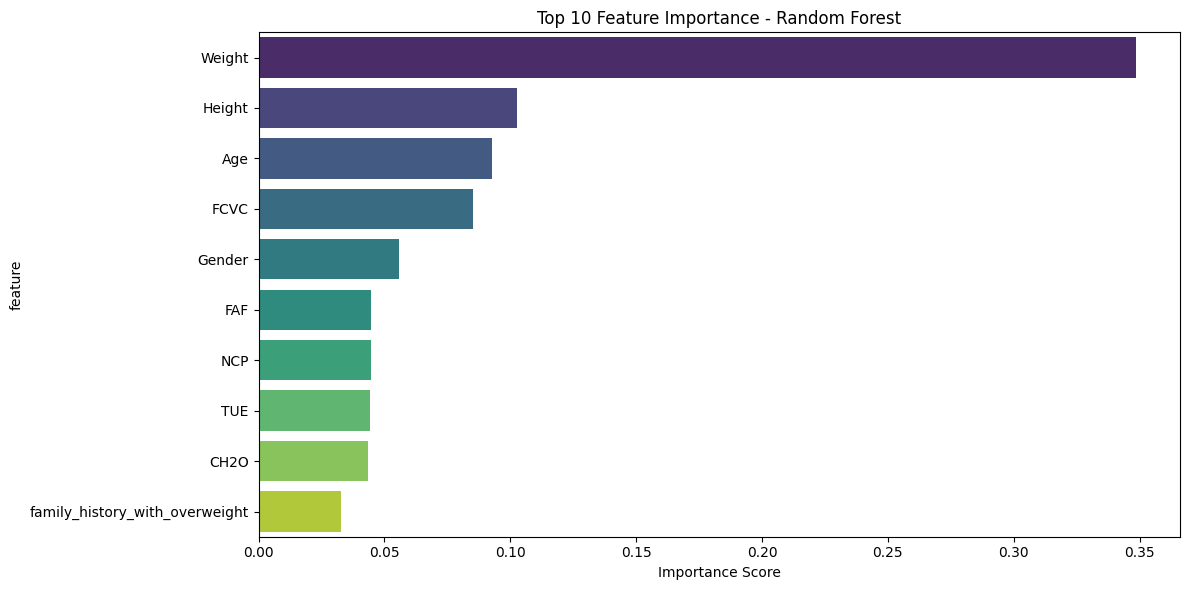

In [38]:
# Cari model terbaik setelah tuning
best_tuned_model = comparison_tuned_df.loc[comparison_tuned_df['Accuracy_After'].idxmax(), 'Model']
best_tuned_accuracy = comparison_tuned_df['Accuracy_After'].max()

print(f"MODEL TERBAIK SETELAH TUNING: {best_tuned_model}")
print(f"AKURASI TERBAIK: {best_tuned_accuracy:.4f}")

# Detail model terbaik
best_result = tuned_results[best_tuned_model]
print(f"\nBest Parameters untuk {best_tuned_model}:")
for param, value in best_result['best_params'].items():
    print(f"  {param}: {value}")

print(f"\nPerforma Final {best_tuned_model}:")
print(f"  Accuracy: {best_result['accuracy']:.4f}")
print(f"  Precision: {best_result['precision']:.4f}")
print(f"  Recall: {best_result['recall']:.4f}")
print(f"  F1-Score: {best_result['f1_score']:.4f}")

# Feature Importance untuk Random Forest atau Decision Tree
if best_tuned_model in ['Random Forest', 'Decision Tree']:
    print(f"\nFeature Importance - {best_tuned_model}:")
    print("-" * 50)
    
    feature_importance = best_result['best_model'].feature_importances_
    feature_names = X.columns
    
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("Top 10 Fitur Terpenting:")
    for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['feature']:20s}: {row['importance']:.4f}")
    
    # Visualisasi Feature Importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df.head(10), x='importance', y='feature', palette='viridis')
    plt.title(f'Top 10 Feature Importance - {best_tuned_model}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

In [39]:
# Simpan model terbaik
best_model_obj = best_result['best_model']
model_filename = f'best_tuned_{best_tuned_model.lower().replace(" ", "_")}_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(best_model_obj, file)

print(f"Model terbaik disimpan sebagai: {model_filename}")

Model terbaik disimpan sebagai: best_tuned_random_forest_model.pkl


## Prediksi

In [40]:
def predict_obesity(age, gender, height, weight, calc, favc, fcvc, ncp, scc, smoke, 
                   ch2o, family_history, faf, tue, caec, mtrans):
    
    # Buat array input
    input_data = np.array([[age, gender, height, weight, calc, favc, fcvc, ncp, scc, smoke,
                           ch2o, family_history, faf, tue, caec, mtrans]])
    
    # Prediksi dengan model terbaik
    prediction = best_model_obj.predict(input_data)[0]
    prediction_proba = best_model_obj.predict_proba(input_data)[0]
    confidence = np.max(prediction_proba)
    
    # Mapping hasil prediksi ke label
    labels = {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I',
              3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 
              6: 'Obesity_Type_III'}
    
    return labels[prediction], confidence

Fungsi untuk memprediksi tingkat obesitas menggunakan Random Forest
    
  Parameters:
  - age: Umur
  - gender: Jenis kelamin (0: Female, 1: Male)
  - height: Tinggi badan (meter)
  - weight: Berat badan (kg)
  - calc: Konsumsi alkohol (0: no, 1: Sometimes, 2: Frequently, 3: Always)
  - favc: Konsumsi makanan berkalori tinggi (0: no, 1: yes)
  - fcvc: Konsumsi sayuran (1-3)
  - ncp: Jumlah makanan utama (1-4)
  - scc: Monitor kalori (0: no, 1: yes)
  - smoke: Merokok (0: no, 1: yes)
  - ch2o: Konsumsi air (1-3)
  - family_history: Riwayat keluarga overweight (0: no, 1: yes)
  - faf: Aktivitas fisik (0-3)
  - tue: Waktu menggunakan teknologi (0-2)
  - caec: Konsumsi makanan antar waktu makan (0: no, 1: Sometimes, 2: Frequently, 3: Always)
  - mtrans: Transportasi (0: Automobile, 1: Bike, 2: Motorbike, 3: Public_Transportation, 4: Walking)
  
  Returns:
  - Prediksi tingkat obesitas

In [42]:
# Contoh prediksi 
prediction, confidence = predict_obesity(
    age=25, gender=1, height=1.75, weight=70, calc=1, favc=0, fcvc=2, ncp=3,
    scc=0, smoke=0, ch2o=2, family_history=0, faf=2, tue=1, caec=1, mtrans=3
)

print(f"Prediksi: {prediction}")
print(f"Confidence: {confidence:.3f}")

Prediksi: Normal_Weight
Confidence: 0.863
